In [38]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
import ipywidgets as widgets

from ipywidgets import interact, interactive, fixed, interact_manual
from bruges.filters import wavelets

### Wavelets

Um aspecto fundamental de qualquer interpretação sísmica nas quais amplitudes são usadas para mapear reservatórios é a forma da wavelet e a resolução sísmica. Em termos de reconhecimento de topo e base das camadas, o seu reconhecimento é controlado pelas propriedades da wavelet.

O traço sísmico é composto de energia e é composto por uma variedade de frequência.


--------

### Exemplos de wavelet

Na interpretação sísmica são utilizadas wavelets idealizadas para gerar traços sínteticos a partir de poços, já que a wavelet exata do traço sísmico é desconhecida. A seguir serão apresentadas alguns exemplos de wavelets.

### Wavelet Ricker 

A <i> wavelet</i> Ricker - segunda derivada da função gaussiana - é definida por uma frequência central única e tem apenas dois lobos laterais. É frequentemente utilizada como <i>wavelet</i> de fase zero em modelagens sintéticas de traços sísmicos. <a href="https://www.researchgate.net/post/Why_Ricker_wavelets_are_not_appropriate_for_synthetic_seismograms">Hosken (1988)</a> e <a href="https://books.google.com.br/books/about/Seismic_Amplitude.html?id=1RYmAwAAQBAJ&redir_esc=y">Simm e Bacon</a> (2014) desaconselha fortemente o uso desta <i> wavelet </i> para a criação de traços sísmicos, os quais podemos enuciar:
    
 <ol>
  <li>Elas não são observadas na natureza;</li>
     <li>As 'standard' computable wavelets for rough and ready synthetic seismograms, they suffer from a confusion of definition-there are several types and</li>
  <li>Ter apenas uma única definição de parâmetro os torna inflexíveis demais para a aplicação de sismograma sintético.</li>
  <li>The Ricker types which show the most similarity with wavelets encountered in synthetic seismogram work may have two loops, three loops or be intermediate fractional-derivative wavelets.</li>
     <li> Minimum-phase Ricker wave lets suffer from a delay which depends on the choice of sample interval. Such
a delay can be subtracted out in an arbitrary way, but again no standard convention exists for doing this. </li>
</ol> 

Matematicamente, a <i>wavelet</i> Ricker pode ser definida como:
    
$$ A(t) = (1-2\pi^2f_M^2t^2)e^{-\pi^2f_M^2t^2} $$

In [14]:
#Criando uma wavelet ricker utilizando o pacote bruges
#frequência de 25Hz, taxa de amostragem de 2ms e  tempo de duração de 256ms
freq = 25
wave_ricker,t_wave = wavelets.ricker(0.256,dt=0.002,f=freq,return_t=True)

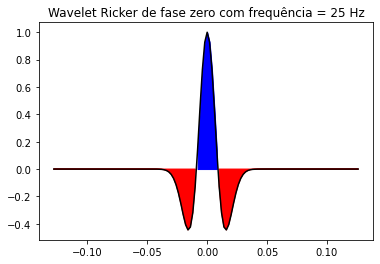

In [18]:
fig, axes = plt.subplots()

axes.set_title(f'Wavelet Ricker de fase zero com frequência = {freq} Hz')
axes.plot(t_wave,wave_ricker,color='black')
axes.fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker>0),color='blue')
axes.fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker<0),color='red')

#### Extraindo o espectro de frequência da wavelet Ricker

In [20]:
N = len(wave_ricker)
dt=0.002
f_max = 1/(2*dt)

In [52]:
def plot_ricker_wavelet(duration,dt,freq):
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))

    wave_ricker,t_wave = wavelets.ricker(duration,dt=dt,f=freq,return_t=True)
    
    axes[0].set_title(f'Wavelet Ricker de fase zero com frequência = {freq} Hz')
    axes[0].plot(t_wave,wave_ricker,color='black')
    axes[0].fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker>0),color='blue')
    axes[0].fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker<0),color='red')
    
    N = len(wave_ricker)
    dt=dt
    f_max = 1/(2*dt)

    yf = fft(wave_ricker)
    xf = np.linspace(0,f_max,N//2)

    axes[1].plot(xf,2.0/N * np.abs(yf[:N//2]),c='black')
    axes[1].fill_between(x=xf,y1= 2.0/N * np.abs(yf[0:N//2]),y2=0,
                 color='blue',alpha=0.5,
                 where=(2.0/N * np.abs(yf[0:N//2])>0))

    axes[1].set_title('Espectro de Frequência')
    
    fig.tight_layout()
    fig.show()

In [53]:
dt = 0.002
@interact(duration_sec=(64,1028,64),
         freq=(5,100,2.5))
def update_ricker_plot(duration_sec,freq):
    plot_ricker_wavelet(duration_sec/1000,dt,freq)

interactive(children=(IntSlider(value=512, description='duration_sec', max=1028, min=64, step=64), FloatSlider…

### Wavelet Gabor

In [56]:
def plot_gabor_wavelet(duration,dt,freq):
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))

    wave_ricker,t_wave = wavelets.gabor(duration,dt=dt,f=freq,return_t=True)
    
    axes[0].set_title(f'Wavelet Gabor de fase zero com frequência = {freq} Hz')
    axes[0].plot(t_wave,wave_ricker,color='black')
    axes[0].fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker>0),color='blue')
    axes[0].fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker<0),color='red')
    
    N = len(wave_ricker)
    dt=dt
    f_max = 1/(2*dt)

    yf = fft(wave_ricker)
    xf = np.linspace(0,f_max,N//2)

    axes[1].plot(xf,2.0/N * np.abs(yf[:N//2]),c='black')
    axes[1].fill_between(x=xf,y1= 2.0/N * np.abs(yf[0:N//2]),y2=0,
                 color='blue',alpha=0.5,
                 where=(2.0/N * np.abs(yf[0:N//2])>0))

    axes[1].set_title('Espectro de Frequência')
    
    fig.tight_layout()
    fig.show()

In [61]:
dt = 0.002
@interact(duration_sec=(64,1028,64),
         freq=(5,100,2.5))
def update_gabor_plot(duration_sec,freq):
    plot_gabor_wavelet(duration_sec/1000,dt,freq)

interactive(children=(IntSlider(value=512, description='duration_sec', max=1028, min=64, step=64), FloatSlider…

## Wavelet Ormby

In [62]:
def plot_ormsby_wavelet(duration,dt,f1,f2,f3,f4):
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))

    wave_ricker,t_wave = wavelets.ormsby(duration,dt=dt,f=(f1,f2,f3,f4),return_t=True)
    
    axes[0].set_title(f'Wavelet Ormsby de fase zero com frequência')
    axes[0].plot(t_wave,wave_ricker,color='black')
    axes[0].fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker>0),color='blue')
    axes[0].fill_between(x=t_wave,y1=wave_ricker,y2=0,where=(wave_ricker<0),color='red')
    
    N = len(wave_ricker)
    dt=dt
    f_max = 1/(2*dt)

    yf = fft(wave_ricker)
    xf = np.linspace(0,f_max,N//2)

    axes[1].plot(xf,2.0/N * np.abs(yf[:N//2]),c='black')
    axes[1].fill_between(x=xf,y1= 2.0/N * np.abs(yf[0:N//2]),y2=0,
                 color='blue',alpha=0.5,
                 where=(2.0/N * np.abs(yf[0:N//2])>0))

    axes[1].set_title('Espectro de Frequência')
    
    fig.tight_layout()
    fig.show()

In [68]:
@interact(duration_sec=(64,1028,64),
                 f1_hz=(0,100,2.5),
                 f2_hz=(5,100,2.5),
                 f3_hz=(10,100,2.5),
                 f4_hz=(20,100,2.5))
def update_omsby_plot(duration_sec,f1_hz,f2_hz,f3_hz,f4_hz):
    plot_ormsby_wavelet(duration_sec/1000,dt,f1_hz,f2_hz,f3_hz,f4_hz)          


interactive(children=(IntSlider(value=512, description='duration_sec', max=1028, min=64, step=64), FloatSlider…